In [30]:
#Relevant imports

import tensorflow as tf
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
%matplotlib inline

# Regression 

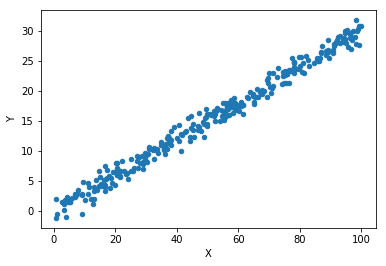

In [6]:
#Creation of Dataset
#10000 datapoints in range 0,100

x = np.linspace(0,100,10000)
noise = np.random.randn(len(x))
y = x * 0.3 + noise

data = pd.concat([pd.DataFrame(data=x, columns=['X']), pd.DataFrame(data=y, columns=['Y'])], axis=1)

data.sample(n=300).plot(kind='scatter', x='X', y='Y')

In [8]:
batch_size = 10

#Placeholders for x and y

xph = tf.placeholder(tf.float32,shape=batch_size)
yph = tf.placeholder(tf.float32,shape=batch_size)

#Variables for weight and bias
w = tf.Variable(0.4)
b = tf.Variable(1.0)

#Operations/Graph/Function

ypred = xph * w + b


In [25]:
#Cost Function or Error Function
error = tf.reduce_mean(tf.square(yph-ypred))

#Optimizer
optimizer = tf.train.GradientDescentOptimizer(learning_rate=0.0001)

#Minimize Cost Function
model = optimizer.minimize(error)

In [26]:
init = tf.global_variables_initializer()

with tf.Session() as sess:
    sess.run(init)
    num_batches = 100
    for batch in range(num_batches):
        #list of 10 random indexes
        rand_ind = np.random.randint(len(data.X),size=batch_size)
        #fetch data at the indexes
        sess.run(model, feed_dict={xph:data.X[rand_ind], yph:data.Y[rand_ind]})
        
    #Fetch weight and bias final values
    final_w, final_b = sess.run([w,b])
        

In [27]:
final_w

0.28993008

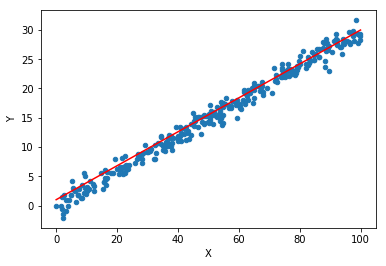

In [29]:
y_pred = data.X * final_w + final_b

data.sample(n=300).plot(kind='scatter',x='X',y='Y')
plt.plot(data.X, y_pred, 'r')

# Regression by tf.Estimator

In [44]:
#Feature Columns for Estimator/Model
feat_cols = [tf.feature_column.numeric_column('x',shape=[1])]

#Linear Regressor Estimator
model = tf.estimator.LinearRegressor(feature_columns=feat_cols)

#Split Data into training and testing dataset'
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3)

#Input function for training
input_func = tf.estimator.inputs.numpy_input_fn({'x':x_train}, y_train, batch_size=4, num_epochs=None, shuffle=True)

#Input function for evaluating error on training dataset
train_input_func = tf.estimator.inputs.numpy_input_fn({'x':x_train}, y_train, batch_size=4, num_epochs=1000, shuffle=False)

#Input function for evaluating error on testing dataset
test_input_func = tf.estimator.inputs.numpy_input_fn({'x':x_test}, y_test, batch_size=4, num_epochs=1000, shuffle=False)

INFO:tensorflow:Using default config.
INFO:tensorflow:Using config: {'_save_checkpoints_secs': 600, '_session_config': None, '_keep_checkpoint_max': 5, '_task_type': 'worker', '_train_distribute': None, '_is_chief': True, '_cluster_spec': <tensorflow.python.training.server_lib.ClusterSpec object at 0x1225b91d0>, '_evaluation_master': '', '_save_checkpoints_steps': None, '_keep_checkpoint_every_n_hours': 10000, '_service': None, '_num_ps_replicas': 0, '_tf_random_seed': None, '_master': '', '_num_worker_replicas': 1, '_task_id': 0, '_log_step_count_steps': 100, '_model_dir': '/var/folders/js/vq_cts194qscfxyy3tzq_lg80000gn/T/tmp71kKtC', '_global_id_in_cluster': 0, '_save_summary_steps': 100}


In [45]:
#Train model

model.train(input_fn=input_func, steps=1000)

INFO:tensorflow:Calling model_fn.
INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Create CheckpointSaverHook.
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
INFO:tensorflow:Saving checkpoints for 1 into /var/folders/js/vq_cts194qscfxyy3tzq_lg80000gn/T/tmp71kKtC/model.ckpt.
INFO:tensorflow:loss = 1502.7432, step = 1
INFO:tensorflow:global_step/sec: 951.051
INFO:tensorflow:loss = 5.4374123, step = 101 (0.107 sec)
INFO:tensorflow:global_step/sec: 1286.83
INFO:tensorflow:loss = 4.0001464, step = 201 (0.078 sec)
INFO:tensorflow:global_step/sec: 1219.97
INFO:tensorflow:loss = 5.4289703, step = 301 (0.081 sec)
INFO:tensorflow:global_step/sec: 1119.42
INFO:tensorflow:loss = 3.6632862, step = 401 (0.090 sec)
INFO:tensorflow:global_step/sec: 917.624
INFO:tensorflow:loss = 8.3964205, step = 501 (0.111 sec)
INFO:tensorflow:global_step/sec: 990.943
INFO:tensorflow:loss = 2.643204, step = 601 (0.099 sec)
INFO:tensorflow:

In [46]:
#Evaluate metrics on training dataset
train_metrics = model.evaluate(train_input_func,steps=1000)

INFO:tensorflow:Calling model_fn.
INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Starting evaluation at 2018-05-16-08:58:04
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Restoring parameters from /var/folders/js/vq_cts194qscfxyy3tzq_lg80000gn/T/tmp71kKtC/model.ckpt-1000
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
INFO:tensorflow:Evaluation [100/1000]
INFO:tensorflow:Evaluation [200/1000]
INFO:tensorflow:Evaluation [300/1000]
INFO:tensorflow:Evaluation [400/1000]
INFO:tensorflow:Evaluation [500/1000]
INFO:tensorflow:Evaluation [600/1000]
INFO:tensorflow:Evaluation [700/1000]
INFO:tensorflow:Evaluation [800/1000]
INFO:tensorflow:Evaluation [900/1000]
INFO:tensorflow:Evaluation [1000/1000]
INFO:tensorflow:Finished evaluation at 2018-05-16-08:58:05
INFO:tensorflow:Saving dict for global step 1000: average_loss = 1.0861715, global_step = 1000, loss = 4.344686


In [47]:
#Evaluate metrics on testing dataset
test_metrics = model.evaluate(test_input_func,steps=1000)

INFO:tensorflow:Calling model_fn.
INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Starting evaluation at 2018-05-16-08:58:43
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Restoring parameters from /var/folders/js/vq_cts194qscfxyy3tzq_lg80000gn/T/tmp71kKtC/model.ckpt-1000
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
INFO:tensorflow:Evaluation [100/1000]
INFO:tensorflow:Evaluation [200/1000]
INFO:tensorflow:Evaluation [300/1000]
INFO:tensorflow:Evaluation [400/1000]
INFO:tensorflow:Evaluation [500/1000]
INFO:tensorflow:Evaluation [600/1000]
INFO:tensorflow:Evaluation [700/1000]
INFO:tensorflow:Evaluation [800/1000]
INFO:tensorflow:Evaluation [900/1000]
INFO:tensorflow:Evaluation [1000/1000]
INFO:tensorflow:Finished evaluation at 2018-05-16-08:58:44
INFO:tensorflow:Saving dict for global step 1000: average_loss = 1.063782, global_step = 1000, loss = 4.255128


In [48]:
#Print metrics corresponding to training and tetsing dataset

print("Training dataset metrics: {}".format(train_metrics))
print("Testing dataset metrics: {}".format(test_metrics))

Training dataset metrics: {'average_loss': 1.0861715, 'global_step': 1000, 'loss': 4.344686}
Testing dataset metrics: {'average_loss': 1.063782, 'global_step': 1000, 'loss': 4.255128}


In [49]:
#Make predictions

x_pred = np.linspace(0,100,100)
input_func_pred = tf.estimator.inputs.numpy_input_fn({'x':x_pred}, shuffle=False)

In [50]:
list(model.predict(input_func_pred))

INFO:tensorflow:Calling model_fn.
INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Restoring parameters from /var/folders/js/vq_cts194qscfxyy3tzq_lg80000gn/T/tmp71kKtC/model.ckpt-1000
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.


[{'predictions': array([0.01332468], dtype=float32)},
 {'predictions': array([0.32121482], dtype=float32)},
 {'predictions': array([0.629105], dtype=float32)},
 {'predictions': array([0.9369952], dtype=float32)},
 {'predictions': array([1.2448853], dtype=float32)},
 {'predictions': array([1.5527756], dtype=float32)},
 {'predictions': array([1.8606658], dtype=float32)},
 {'predictions': array([2.168556], dtype=float32)},
 {'predictions': array([2.476446], dtype=float32)},
 {'predictions': array([2.7843363], dtype=float32)},
 {'predictions': array([3.0922265], dtype=float32)},
 {'predictions': array([3.4001164], dtype=float32)},
 {'predictions': array([3.7080069], dtype=float32)},
 {'predictions': array([4.015897], dtype=float32)},
 {'predictions': array([4.323787], dtype=float32)},
 {'predictions': array([4.631677], dtype=float32)},
 {'predictions': array([4.939567], dtype=float32)},
 {'predictions': array([5.2474575], dtype=float32)},
 {'predictions': array([5.555348], dtype=float32)},

In [51]:
predictions = []
for x in estimator.predict(input_func_pred):
    predictions.append(x['predictions'])

INFO:tensorflow:Calling model_fn.
INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Restoring parameters from /var/folders/js/vq_cts194qscfxyy3tzq_lg80000gn/T/tmpPzN5rj/model.ckpt-1000
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.


In [52]:
predictions

[array([0.02133261], dtype=float32),
 array([0.3149166], dtype=float32),
 array([0.6085006], dtype=float32),
 array([0.90208465], dtype=float32),
 array([1.1956686], dtype=float32),
 array([1.4892527], dtype=float32),
 array([1.7828367], dtype=float32),
 array([2.0764205], dtype=float32),
 array([2.3700044], dtype=float32),
 array([2.6635885], dtype=float32),
 array([2.9571726], dtype=float32),
 array([3.2507565], dtype=float32),
 array([3.5443406], dtype=float32),
 array([3.8379245], dtype=float32),
 array([4.131509], dtype=float32),
 array([4.4250927], dtype=float32),
 array([4.7186766], dtype=float32),
 array([5.0122604], dtype=float32),
 array([5.305845], dtype=float32),
 array([5.5994287], dtype=float32),
 array([5.893013], dtype=float32),
 array([6.186597], dtype=float32),
 array([6.4801807], dtype=float32),
 array([6.7737646], dtype=float32),
 array([7.067349], dtype=float32),
 array([7.360933], dtype=float32),
 array([7.6545167], dtype=float32),
 array([7.948101], dtype=float32

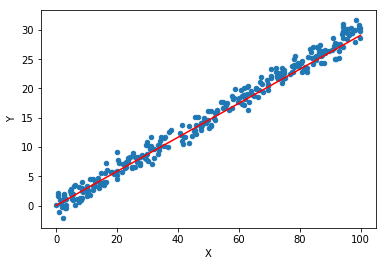

In [53]:
data.sample(n=300).plot(kind='scatter',x='X',y='Y')
plt.plot(x_pred,predictions,'r')